## Logistic regression to perform two-class and multi-class classification for real-world tasks. 
### Part-1 (Binary Classification):

For this problem, we will use a subset of [Wisconsin Breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). Note that this dataset has some information missing. 

**1.1 Data Munging** 

Cleaning the data is essential when dealing with real world problems. Training and testing data is stored in "data/wisconsin_data" folder. You have to perform the following:
* Read the training and testing data. Print the number of features in the dataset.
* For the data label, print the total number of 1's and 0's in the training and testing data. Comment on the class distribution. Is it balanced or unbalanced?
* Print the number of features with missing entries.
* Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values from observed entries.
* Normalize the training and testing data.

**1.2 Logistic Regression ** 
Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1. Report accuracy, precision, recall, f1-score and print the confusion matrix.

**1.3 Choosing the best hyper-parameter ** 
* For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333}.
* For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33}.

To choose the best hyperparameter (alpha/lambda) value, you have to do the following:
* For each value of hyperparameter, perform 100 random splits of training data into training and validation data. 
* Find the average validation accuracy for each 100 train/validate pairs.
The best hyperparameter will be the one that gives maximum validation accuracy. Use the best alpha and lambda parameter to re-train your final L1 and L2 regularized model. Evaluate the prediction performance on the test data and report the following:
* Precision
* Accuracy
* The top 5 features selected in decreasing order of feature weights.
* Confusion matrix

Finally, discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

### Part-2 (Multiclass Classification):

For this experiment, we will use a small subset of [MNIST dataset for handwritten digits](http://yann.lecun.com/exdb/mnist/). This dataset has no missing data. You will have to implement one-versus-rest scheme to perform multi-class classification using a binary classifier based on L1 regularized logistic regression. 

**2.1 Read and understand the data, create a default One-vs-Rest Classifier **

1- Use the data from the file reduced_mnist.csv in the data directory. Begin by reading the data. Print the following information:

* Number of data points
* Total number of features
* Unique labels in the data

2- Split the data into 70% training data and 30% test data. Fit a One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data.

**2.2 Choosing the best hyper-parameter **

1- As in section **1.3** above, now create 10 random splits of training data into training and validation data. Choose the best value of alpha from the following set: {0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333}.
To choose the best alpha hyperparameter value, you have to do the following:

* For each value of hyperparameter, perform 10 random splits of training data into training and validation data as said above. 
* For each value of hyperparameter, use its 10 random splits and find the average training and validation accuracy.
* On a graph, plot both the average training accuracy (in red) and average validation accuracy (in blue) w.r.t. each hyperparameter setting. Comment on this graph by identifying regions of overfitting and underfitting. 
* Print the best value of alpha hyperparameter.

2- Evaluate the prediction performance on test data and report the following:
* Total number of non-zero features in the final model.
* The confusion matrix
* Precision, recall and accuracy for each class.

Finally, discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

## References
* [Finding missing values](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe)
* [Titanic Problem](http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
* [Numpy: Sorting and Searching](http://docs.scipy.org/doc/numpy/reference/routines.sort.html)
* [Multiclass Classification](http://scikit-learn.org/stable/modules/multiclass.html)

# Part-1 (Binary Classification) Solutions

## Importing Libraries

Here we are going to import libraries that are to be used for executing the code.

In [3]:
import numpy as num                                                   #It is used for arrays, calculations and matrices
import pandas as pd                                                   #It is used for reading and writing the csv files
from sklearn.preprocessing import scale                               #It is used for normalizing the data
from sklearn.linear_model import LogisticRegression                   #It is used for implememnting the L1 and L2 regualrizations
from sklearn.metrics import recall_score                              #It is used for calculating the recall score
from sklearn.metrics import f1_score                                  #It is used for calculating the f1 score
from sklearn.metrics import confusion_matrix                          #It is used for calculating the confusion matrix
from sklearn.metrics import accuracy_score                            #It is used for calculating the accuracy score
from sklearn.metrics import precision_score                           #It is used for calculating the precision score
from sklearn.cross_validation import train_test_split                 #It is used for splitting the data in 2 parts
import matplotlib.pyplot as plt                                       #It is used for plotting graphs and charts
%matplotlib inline

## 1.1 Data Munging Solutions

### a. Reading Files

Here we are going to read the training and test data files using pandas and print the number of features in the dataset.

In [4]:
#Reading training file and storing in the traindata variable
traindata = pd.read_csv("data/wisconsin_data/train_wbcd.csv", delimiter=',')
#print traindata

#Reading test file and storing in the testdata variable
testdata = pd.read_csv("data/wisconsin_data/test_wbcd.csv", delimiter=',')
#print testdata

As the type of traindata and testdata is Dataframe, i'm using iloc to retrieve the values from it. After selecting the columns for each dataset, len function is used to find the total features.

In [5]:
#Selecting all rows and the selected columns for the features from the training data
train_feature = traindata.iloc[:,2:32]
print "Number of features in train data are :",len(train_feature.T)

#Selecting all rows and the selected columns for the features from the test data
test_feature = testdata.iloc[:,2:32]
print "Number of features in test data are  :",len(test_feature.T)

Number of features in train data are : 30
Number of features in test data are  : 30


### b. Finding 1's and 0's

Here, we have to find number of 1's and 0's for training and test data. For this, we are first checking if the value in the traindata/testdata is equal to 1/0 and then selecting the sum along each row and then doing the final sum for that label.

In [6]:
#Calculating the 1's and 0's in the training data
print "Number of 0 in training set is : ",(traindata == 0).astype(int).sum(axis=0).sum()
print "Number of 1 in training set is : ",(traindata == 1).astype(int).sum(axis=0).sum()

#Calculating the 1's and 0's in the test data
print "Number of 0 in test set is     : ",(testdata == 0).astype(int).sum(axis=0).sum()
print "Number of 1 in test set is     : ",(testdata == 1).astype(int).sum(axis=0).sum()


Number of 0 in training set is :  36
Number of 1 in training set is :  0
Number of 0 in test set is     :  6
Number of 1 in test set is     :  0


If we look at the number of 0's and 1's in training set, it is 36 and 0 respectively. We can see the overall ratio is very high. From this, we can interpret that the class distribution is <b>unbalanced</b>. For the class distributio to be balanced the ratio of 1's and 0's should be same.

### c. Finding missing values

Here, we have to find the missing values in training and test data. We are using pandas to convert it to dataframe, so that we can use the isnull() function under pandas to find the null values. If we use sum() function once, it will list null values for each feature, so to find the entire sum of missing values we are summing up the values for each feature again.

In [7]:
#Computing the missing entries in the training data
traindata = pd.DataFrame(traindata)
print "Features with missing entries in training set : ",traindata.isnull().sum().sum()

#Computing the missing entries in the test data
testdata = pd.DataFrame(testdata)
print "Features with missing entries in test set     : ",testdata.isnull().sum().sum()

Features with missing entries in training set :  2
Features with missing entries in test set     :  1


### d. Filling missing values

Here, we have to fill the missing values in training and test data. From the above code, we found out the missing values were missing in the feature f21. To fill the values, we can either use mean or median values but here median is used. We are selecting the entire feature column f21 and using the median to calculate the value. To fill the value, fillna function is used that will subsitute the median value in the missing data. In the output we can see now there are no missing values in the train and test features.

In [8]:
train_feature ["f21"] =train_feature ["f21"].fillna(train_feature ["f21"].median() )
print "Features with missing entries in training set : ",pd.isnull(train_feature).sum().sum()

#print train_feature ["f21"].median()
test_feature ["f21"] =test_feature ["f21"].fillna(test_feature ["f21"].median() )

print "Features with missing entries in test set : ",pd.isnull(test_feature).sum().sum()

Features with missing entries in training set :  0
Features with missing entries in test set :  0


### e. Normalizing the dataset

We are using the scale function to normalize the traindata and testdata.

In [9]:
train_feature = scale(train_feature)
#print Xnorm_train_feature

In [10]:
test_feature = scale(test_feature)
#print Xnorm_test_feature

## 1.2 Logistic Regression

We are training our model using logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1. We have created the function modeltraining which accepts either alpha/lambda value and the regularization value and then we use the logisticregression function to compute our model. To compute the different scores we have passed the true labels and the predicted labels in the following functions:

<b>Accuracy</b> - accuracy_score

<b>Precision</b> - precision_score

<b>Recall</b> - recall_score

<b>F1</b> - f1_score

<b>Confusion Matrix</b> - confusion_matrix

As we can see the labels are not in binary format, so we have used average='weighted'.

In [11]:
def modeltraining(val,regularization):
        c_val = 1/val                                       #calculating the c value
        
        #initialize the logisitc regression model.
        my_model = LogisticRegression(C=c_val,penalty=regularization)

        #Create the training/testing data and labels
        Xtrain = num.array(train_feature[:,:])
        ytrain = traindata.iloc[:,1]

        Xtest = num.array(test_feature[:,:])
        ytest = testdata.iloc[:,1]

        #print Xtrain.shape
        #print ytrain.shape
        #print Xtest.shape
        #print ytest.shape
        
        my_model.fit(Xtrain, ytrain.values)               #fitting the model with the training values
        
        predict_label = my_model.predict(Xtest)           #predicting the model values

        #the original label is ytest
        true_label = ytest.values

        #print "The true labels are       : {}".format(true_label)
        #print "Model predicted labels are: {}".format(predict_label)'''
        
        print 
        print "Model accuracy is: {}%".format(num.round(accuracy_score(true_label, predict_label)*100, decimals=2))
        print
        print "Confusion Matrix is :"
        print confusion_matrix(true_label, predict_label, labels=["B", "M"])
        print
        print "Precision score is :",precision_score(true_label, predict_label,labels=["B","M"],average='weighted')
        print "Recall score is: ",recall_score(true_label, predict_label,labels=["B","M"],average='weighted')
        print "F1-Score is :",f1_score(true_label, predict_label,average='weighted')

Training using <b>L1</b> regularization. In the output, we can see the accuracy accounts to 90%.

In [12]:
#assigining the alpha value and calling the above function modeltraining with l1 regularization

alpha = 0.1
modeltraining(num.float(alpha),'l1')


Model accuracy is: 90.0%

Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9


Training using <b>L2</b> regularization. In the output, we can see the accuracy accounts to 90%.

In [13]:
#assigining the lambda value and calling the above function modeltraining with l2 regularization

lambdaval = 0.1
modeltraining(num.float(lambdaval),'l2')


Model accuracy is: 90.0%

Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9


## 1.3 Choosing the best hyper-parameter

### a. Random Splits

For choosing the best hyper parameter we have to perform 100 random splits for training data into training and validation data and compute the average accuracy for each pair. We have created the function besthyperparameter which accepts either alpha/lambda value and also regularization l1 and l2 respectively. We have added the labels to the training features using the column stack under the numpy library and then split the data. 

In [14]:
def besthyperparameter(val,regularization):
    trials=100                                                      #To run loop 100 times
    c_val = 1/val                                                   #calculating the c value
    my_model = LogisticRegression(C=c_val,penalty=regularization)   #initializing the model 
    model_accs  = num.zeros(trials)                                 #storing model accuracy
    
    for i in range(0,trials):
        
        #Spliting the training data into training and validation data
        #train_feature only contains features and not the labels
        #using column stack from numpy library for appending the labels columns to the features column
        #using train_test_split function to split the training data
        
        Dtrain, Dval = train_test_split((num.column_stack((train_feature,(traindata.iloc[:,1])))), test_size=0.3)
        
        #Dtrain contains the training data
        Xtrain = num.array(Dtrain[:, 0:30])
        ytrain = num.array(Dtrain[:,30])

        #Dval contains the validation data
        Xval = num.array(Dval[:, 0:30])
        yval = num.array(Dval[:,30])
        
        #fitting the model with the training values
        my_model.fit(Xtrain,ytrain)
        
        ypredicts = my_model.predict(Xval)                         #prediciting the labels using the validation data
        ytruelabels = yval                                         #calculating the true lables
        model_accs[i]  = accuracy_score(ytruelabels, ypredicts)    #For each iteration storing the accuracy value
        
        #To compute average accuracy over 100 random splits we are taking the mean of all the values
    return num.mean(model_accs)

Now, we are calling the above defined functions with the set of alpha values and l1 regularization. We are computing the average accuracy for each alpha value and finding out the best alpha value which gives the maximum accuracy value.

In [15]:
alpha_vals = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]                 #Array of alpha values
l1_acc = num.zeros(len(alpha_vals))                                           #Creating an array of equal length
index=0

for l in alpha_vals:
    l1_acc[index] = besthyperparameter(num.float(l),'l1')                     #Calling function with each alpha value
    index+=1

index = 0
for acc_val in alpha_vals:
    print "Accuracy Score when alpha is {} using L1 model is : {}".format(alpha_vals[index],l1_acc[index])
    index+=1
    
max_index_l1  = num.argmax(l1_acc)                                            #Using argmax to find the index with max value
best_alpha = alpha_vals[max_index_l1]                                         #Passing the max value to retrieve the alpha value
    
print "Best Alpha: {}".format(best_alpha)

Accuracy Score when alpha is 0.1 using L1 model is : 0.987666666667
Accuracy Score when alpha is 1 using L1 model is : 0.985333333333
Accuracy Score when alpha is 3 using L1 model is : 0.972333333333
Accuracy Score when alpha is 10 using L1 model is : 0.938666666667
Accuracy Score when alpha is 33 using L1 model is : 0.58
Accuracy Score when alpha is 100 using L1 model is : 0.579666666667
Accuracy Score when alpha is 333 using L1 model is : 0.582
Accuracy Score when alpha is 1000 using L1 model is : 0.570666666667
Accuracy Score when alpha is 3333 using L1 model is : 0.582
Accuracy Score when alpha is 10000 using L1 model is : 0.571333333333
Accuracy Score when alpha is 33333 using L1 model is : 0.585333333333
Best Alpha: 0.1


Now, we are calling the above defined functions with the set of lambda values and l2 regularization. We are computing the average accuracy for each lambda value and finding out the best lambda value which gives the maximum accuracy value.

In [16]:
lambda_vals = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]                  #Array of lambda values
l2_acc = num.zeros(len(lambda_vals))                                         #Creating an array of equal length
index=0

for l in lambda_vals:
    l2_acc[index] = besthyperparameter(num.float(l),'l2')                    #Calling function with each lambda value
    index+=1

index = 0
for acc_val in lambda_vals:
    print "Accuracy Score when lambda is {} using L2 model is : {}".format(lambda_vals[index],l2_acc[index])
    index+=1
    
max_index_l2  = num.argmax(l2_acc)                                          #Using argmax to find the index with max value
best_lambda = lambda_vals[max_index_l2]                                     #Passing the max value to retrieve the lambda value
    
print "Best Lambda: {}".format(best_lambda)

Accuracy Score when lambda is 0.001 using L2 model is : 0.988
Accuracy Score when lambda is 0.003 using L2 model is : 0.987333333333
Accuracy Score when lambda is 0.01 using L2 model is : 0.988
Accuracy Score when lambda is 0.03 using L2 model is : 0.993
Accuracy Score when lambda is 0.1 using L2 model is : 0.994333333333
Accuracy Score when lambda is 0.3 using L2 model is : 0.992333333333
Accuracy Score when lambda is 1 using L2 model is : 0.994333333333
Accuracy Score when lambda is 3 using L2 model is : 0.992333333333
Accuracy Score when lambda is 10 using L2 model is : 0.991333333333
Accuracy Score when lambda is 33 using L2 model is : 0.976333333333
Best Lambda: 0.1


### b. Retraining Model

Now we have to retrain our model using the best alpha and lambda values using l1 and l2 regularization and predict the performance on the test data. We need to also evaluate the accuracy, precision, recall, f1-score, confusion matrix and the top five weights in the decreasing order.

In [17]:
def retrainModel(val,regularization):
    
    c_val=num.float(1/val)                                                    #calculating the c value
    my_model = LogisticRegression(C=c_val,penalty=regularization)             #initializing the model

    #Create the training/testing data and labels
    Xtrain = num.array(train_feature[:,:])
    ytrain = traindata.iloc[:,1]

    Xtest = num.array(test_feature[:,:])
    ytest = testdata.iloc[:,1]
    
    my_model.fit(Xtrain, ytrain.values)                                       #fitting the model with the training values
    
    predict_label = my_model.predict(Xtest)                                   #predicting the model values

    true_label = ytest.values                                                 #the original label is ytest

    model_weights   = my_model.coef_                                          #calculating the coefficients
    weights = ((num.argsort(model_weights))[0])[::-1]                         #sorting the model weights in descending order
    
    #print "The true labels are       : {}".format(true_label)
    #print
    #print "Model predicted labels are: {}".format(predict_label)
    #print
    
    print accuracy_score(true_label, predict_label)
    print "Model accuracy is: {}%".format(num.round(accuracy_score(true_label, predict_label)*100, decimals=2))
    print
    print "Confusion Matrix is :"
    print confusion_matrix(true_label, predict_label, labels=["B", "M"])
    print
    print "Precision score is :",precision_score(true_label, predict_label,labels=["B","M"],average='weighted')
    print "Recall score is: ",recall_score(true_label, predict_label,labels=["B","M"],average='weighted')
    print "F1-Score is :",f1_score(true_label, predict_label,average='weighted')
    print
    print "Top 5 features selected in decreasing order of feature weights are:"
    print weights[0:5]+1                                                     #taking top 5 weights

Passing the <b>best alpha value</b> to call the retrainModel function.

In [18]:
#retraining the model with best alpha value and l1 regularization
retrainModel(best_alpha,'l1')

0.9
Model accuracy is: 90.0%

Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9

Top 5 features selected in decreasing order of feature weights are:
[23 22 25 21  4]


Passing the <b>best lambda value</b> to call the retrainModel function.

In [19]:
#retraining the model with best lambda value and l2 regularization
retrainModel(best_lambda,'l2')

0.9
Model accuracy is: 90.0%

Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9

Top 5 features selected in decreasing order of feature weights are:
[22  2 25 21 23]


<b>Underfitting/Overfitting</b>

A model that can not model the training model or cannot generalize the data is overfitting and it usually gives low performance on data. Whereas if a model trains too well it is overfitting, but there are chances that this model may react to noise and hence cause a negative impact. 

When we used different values of alpha for L1 and lambda for L2 regularizations, we saw that training accuracy went down drastically for L1 when alpha value was changed from 10 to 33. If the performance goes down, it means the model is overfitting and learning the irrelevant noise and details. We need to find the best fit for the data before it starts giving the error. But in case of L2 regularization, there was just a slight variation for the accuracy. It was basically reacting to each value of lambda and may be a good fit for the data.

When we retrained our model with the best alpha and lambda values, accuracy was still the same. along with the precision, recall and f1 score. Hence the best value is the best fit for the data as it si not adhering to any noise. We can interpret that the top 5 features are different when using l1 reglarization and l2 regularization.


# Part -2 (Multiclass Classification) Solutions

## 2.1 One-vs-Rest Classifier

### 1. Reading files and Printing data

Here we are reading the data file using pandas and finding the following:

a. Number of data points - By using the len function

b. Total number of features - By taking transpose of data and finding the total features.

c. Unique labels - By using unique function under numpy library

In [20]:
#Reading the file
data = pd.read_csv("data/mnist/reduced_mnist.csv", delimiter=',')
print "Number of data points are :", len(data)

#Computing number of features in the data
data_feature = data.iloc[:,1:]
print "Total Number of features in data are :",len(data_feature.T)

#Computing unique labels in the data
unique_labels = num.unique(data.iloc[:,0])
print "Unique labels in the data are :", unique_labels

Number of data points are : 2520
Total Number of features in data are : 784
Unique labels in the data are : [0 1 2 3 4 5 6 7 8 9]


### 2. Fitting One-vs-Rest Classifier

In this part, we have to split the data. We can directly take the 70% and 30% of data, but here we are randomly spliting the data into 70% training and 30% test data as it is not mentioned.

In [21]:
#Randomly selecting the data by spliting it into 70% and 30%
mask = num.random.rand(len(data)) < 0.7

#taking the 70% data
train = data[mask]

#taking the 30% data
test = data[~mask]

print len(train)                                    #length of the training data
print len(test)                                     #Length of the test data

1781
739


We have created the function onevsrestClassifier which takes the alpha value and trains the model using l1 regularization and then computes the accuracy, precision, confusion matrix and recall score. By default, logistic regression uses the one vs rest classifier as it sets the multi_class='ovr'. If you want to write it, you can use <b>multi_class='ovr'</b> inside the logisticregression function.

In [22]:
def onevsrestClassifier(val):
    c_val=num.float(1/val)                                               #calculating the c value
    my_model = LogisticRegression(C=c_val,penalty='l1')                  #initializing the logistic regression model

    #Create the training/testing data and labels
    Xtrain = train.iloc[:,:]
    ytrain = train.iloc[:,0]

    Xtest = test.iloc[:,:]
    ytest = test.iloc[:,0]
    
    my_model.fit(Xtrain.values, ytrain.values)                           #fitting the model with the training values
    
    predict_label = my_model.predict(Xtest)                              #predicting the model with the test value

    true_label = ytest.values                                            #the original label is ytest
    
    print accuracy_score(true_label, predict_label)
    print "Model accuracy is: {}%".format(num.round(accuracy_score(true_label, predict_label)*100, decimals=2))
    print
    print "Confusion Matrix is :"
    print confusion_matrix(true_label, predict_label)
    print
    print "Precision score is :",precision_score(true_label, predict_label,average='weighted')
    print "Recall score is: ",recall_score(true_label, predict_label,average='weighted')

Calling the above defined function by passing alpha value as 1.

In [23]:
#Using alpha value as 1 we are calling the onevsrestClassifier function
onevsrestClassifier(1)

0.845737483085
Model accuracy is: 84.57%

Confusion Matrix is :
[[62  1  1  0  0  0  1  1  1  0]
 [ 0 75  1  1  0  1  0  0  0  0]
 [ 1  3 65  3  2  1  2  0  3  0]
 [ 1  0  8 64  0  6  1  0  0  1]
 [ 1  0  0  0 63  0  1  1  5  7]
 [ 4  0  3  5  0 58  1  0  5  2]
 [ 2  0  0  0  0  0 59  0  0  0]
 [ 0  1  2  0  2  0  0 65  3  3]
 [ 0  3  2  1  1  3  0  0 50  2]
 [ 2  0  2  0  2  2  0  3  3 64]]

Precision score is : 0.848010027283
Recall score is:  0.845737483085


## 2.2 Choosing the best hyper-parameter

### 1. Random Splits for Training

Here we are taking 10 random splits for the training data into training and validation, and finding the average accuracy for each pair. We are spliting our training data into Dtrain and Dval by giving the test size as 0.3.

In [24]:
def choosebestvalhyperparameter(val):
    trials=10                                                              #running the loop for 10 times
    c_val = 1/val                                                          #calculating the c value
    my_model = LogisticRegression(C=c_val,penalty='l1')                    #initalizing the logistic regression model with l1
    model_accs  = num.zeros(trials)                                        #storing model accuracy
    
    for i in range(0,trials):
        Dtrain, Dval = train_test_split(train.iloc[:,:], test_size=0.3)    #Spliting the training into training and validation
    
        Xtrain = Dtrain.iloc[:, 1:]
        ytrain = Dtrain.iloc[:,0]

        Xval = Dval.iloc[:, 1:]
        yval = Dval.iloc[:,0]
        
        #print Xtrain.shape
        #print ytrain.shape
        #print Xval.shape
        #print yval.shape
        
        my_model.fit(Xtrain,ytrain)                                        #fitting the model with the training values
        
        ypredicts = my_model.predict(Xval)                                 #predicting the values using val values
        ytruelabels = yval                                                 #assiging the values to true labels
        model_accs[i]  = accuracy_score(ytruelabels, ypredicts)            #storing accuracy for each run
        
        #To find the average value of accuracy, we are taking the mean of all the values
    return num.mean(model_accs)

Now, we are calling the above defined functions with the set of alpha values and l1 regularization. We are computing the average accuracy and finding out the best alpha value which gives the maximum accuracy value.

In [25]:
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]             #Creating an array of alpha values

l1_val_acc = num.zeros(len(alpha_vals))                                          #creating an array of equal length
index=0

for l in alpha_vals:
    l1_val_acc[index] = choosebestvalhyperparameter(num.float(l))                #calling the function with each alpha value
    index+=1

index = 0
for acc_val in alpha_vals:
    print "Accuracy Score when alpha is {} using L1 model is : {}".format(alpha_vals[index],l1_val_acc[index])
    index+=1
    
max_index_l1_val  = num.argmax(l1_val_acc)                                      #Finding the index with the max accuracy value
best_val_alpha = alpha_vals[max_index_l1_val]                                   #Finding the best alpha value
    
print "Best Alpha: {}".format(best_val_alpha)

Accuracy Score when alpha is 0.1 using L1 model is : 0.842990654206
Accuracy Score when alpha is 1 using L1 model is : 0.840186915888
Accuracy Score when alpha is 3 using L1 model is : 0.835700934579
Accuracy Score when alpha is 10 using L1 model is : 0.841121495327
Accuracy Score when alpha is 33 using L1 model is : 0.84953271028
Accuracy Score when alpha is 100 using L1 model is : 0.851401869159
Accuracy Score when alpha is 333 using L1 model is : 0.862803738318
Accuracy Score when alpha is 1000 using L1 model is : 0.851962616822
Accuracy Score when alpha is 3333 using L1 model is : 0.800934579439
Accuracy Score when alpha is 10000 using L1 model is : 0.711962616822
Accuracy Score when alpha is 33333 using L1 model is : 0.556074766355
Best Alpha: 333


### 2. Random Splits for Data

Here we are taking 10 random splits for the data into training and testing, and finding the average accuracy for each pair. We are spliting our original data into Dtrain and Dval by giving the test size as 0.3.

In [26]:
def choosebesttrainhyperparameter(val):
    trials=10                                                               #Running the loop 10 times
    c_val = 1/val                                                           #Calculating the c value
    my_model = LogisticRegression(C=c_val,penalty='l1')                     #Initializing the logistic regression model with l1
    model_accs  = num.zeros(trials)                                         #storing model accuracy
    
    for i in range(0,trials):
        Dtrain, Dval = train_test_split(data.iloc[:,:], test_size=0.3)      #Splitting the data into training and test
    
        Xtrain = Dtrain.iloc[:, 1:]
        ytrain = Dtrain.iloc[:,0]

        Xtest = Dval.iloc[:, 1:]
        ytest = Dval.iloc[:,0]
        
        #print Xtrain.shape
        #print ytrain.shape
        #print Xval.shape
        #print yval.shape
        
        my_model.fit(Xtrain,ytrain)                                         #fitting the model with the training values
        
        ypredicts = my_model.predict(Xtest)                                 #prediciting the labels with the test values
        ytruelabels = ytest                                                 #assiging the true labels
        model_accs[i]  = accuracy_score(ytruelabels, ypredicts)             #storing accuracy for each run
        
        #To find the average value of accuracy, we are taking the mean of all the values
        
    return num.mean(model_accs)

Now, we are calling the above defined functions with the set of alpha values and l1 regularization. We are computing the average accuracy and finding out the best alpha value which gives the maximum accuracy value.

In [27]:
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]          #Creating an array of alpha values

l1_train_acc = num.zeros(len(alpha_vals))                                     #creating an array of equal length
index=0

for l in alpha_vals:
    l1_train_acc[index] = choosebesttrainhyperparameter(num.float(l))         #calling the function with each alpha value
    index+=1

index = 0
for acc_val in alpha_vals:
    print "Accuracy Score when alpha is {} using L1 model is : {}".format(alpha_vals[index],l1_train_acc[index])
    index+=1
    
max_index_l1_train  = num.argmax(l1_train_acc)                                #Finding the index with the max accuracy value
best_train_alpha = alpha_vals[max_index_l1_train]                             #Finding the best alpha value
    
print "Best Alpha: {}".format(best_train_alpha)

Accuracy Score when alpha is 0.1 using L1 model is : 0.834391534392
Accuracy Score when alpha is 1 using L1 model is : 0.836772486772
Accuracy Score when alpha is 3 using L1 model is : 0.833333333333
Accuracy Score when alpha is 10 using L1 model is : 0.835582010582
Accuracy Score when alpha is 33 using L1 model is : 0.845899470899
Accuracy Score when alpha is 100 using L1 model is : 0.859788359788
Accuracy Score when alpha is 333 using L1 model is : 0.870502645503
Accuracy Score when alpha is 1000 using L1 model is : 0.860846560847
Accuracy Score when alpha is 3333 using L1 model is : 0.826984126984
Accuracy Score when alpha is 10000 using L1 model is : 0.738888888889
Accuracy Score when alpha is 33333 using L1 model is : 0.605158730159
Best Alpha: 333


### 3. Plotting Average Training Accuracy/ Validation Accuracy

Here we are going to plot the graph for the average training accuracy versus average validation accuracy. From the graph, we can see both the training and validation accuracy are producing the best accuracy for the alpha value 333. 

Underfitting can usually be detected by observing low accuracy on training set, but in this case it is reacting to each value of alpha. It is difficult to tell if it is underfitting. 

Overfitting can usually be detected by if there is great mismatch between accuracies on train and validation sets. Here, we can see there is not a great mismatch between the values, there is just a slight variation.It's normal to have validation set accuracy slightly lower than train set accuracy, which can be seen after the alpha value is increased after 333. IT is difficult to discuss if it is overfitting.

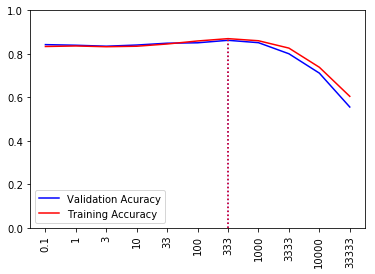

In [28]:
#plot the accuracy curve
plt.plot(range(0,len(alpha_vals)), l1_val_acc, color='b', label='Validation Acuracy')
plt.plot(range(0,len(alpha_vals)), l1_train_acc, color='r', label='Training Accuracy')

#replace the x-axis labels with penalty values
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical') 

#Highlight the best values of alpha for training and validation accuracy
plt.plot((max_index_l1_val, max_index_l1_val), (0, l1_val_acc[max_index_l1_val]), ls='dotted', color='b')
plt.plot((max_index_l1_train, max_index_l1_train), (0, l1_train_acc[max_index_l1_train]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")

### 4. Evaluating Performance on Test Data

Here, we are going to retrain our model using the best alpha value and compute the following:

a. Number of non-zero features

b. Confusion Matrix

c. Precision, Accuracy and Recall for each class

In [29]:
def retrainfinalModel(val):
    
    c_val=num.float(1/val)                                             #Calculating the c value
    my_model = LogisticRegression(C=c_val,penalty='l1')                #initializing the logistic regression model with l1

    #Create the training/testing data and labels
    Xtrain = train.iloc[:,:]
    ytrain = train.iloc[:,0]

    Xtest = test.iloc[:,:]
    ytest = test.iloc[:,0]
    
    my_model.fit(Xtrain.values, ytrain.values)                         #fitting the model with the training values
    
    predict_label = my_model.predict(Xtest)                            #prediciting the values with the test values

    true_label = ytest.values                                          #the original label is ytest

    print "Number of non-zero feautres are: ", num.count_nonzero(my_model.coef_)    #Computing number of non zero features
    print
    print "Confusion Matrix is :"
    print confusion_matrix(true_label, predict_label)
    
    cm = confusion_matrix(true_label, predict_label)                    #Computing the confusion matrix
    TP = num.diag(cm)                                                   #Computing the True Positive
    FP = cm.sum(axis=0) - num.diag(cm)                                  #Computing the False Positive
    FN = cm.sum(axis=1) - num.diag(cm)                                  #Computing the False Negative
    TN = cm.sum() - (FP + FN + TP)                                      #Computing the True Negative
    
    i = 0
    
    #Creating an empty array
    precision = []                                                      
    recall = []
    accuracy = []
    
    while i in range(0,10):
        precision.append(float(TP[i])/float(TP[i] + FP[i]))                       #Computing the precision for each class
        recall.append(float(TP[i])/float(TP[i]+FN[i]))                            #Computing the recall for each class
        accuracy.append(float(TP[i] + TN[i])/float(TP[i]+TN[i]+FP[i]+FN[i])*100)  #Computing the accuracy for each class
        i+=1
    
    i=0
    print
    print "Labels                    Precision                        Recall                               Accuracy"
    while i in range(0,10):
           print "{}                        {}                   {}                        {}" .format(i,precision[i],recall[i],accuracy[i])
           print
           i+=1

Calling the above defined function using the best alpha value.

In [30]:
#Retraining the final model with the best alpha value
retrainfinalModel(num.float(best_alpha))

Number of non-zero feautres are:  4292

Confusion Matrix is :
[[64  1  1  0  0  0  0  0  1  0]
 [ 0 77  1  0  0  0  0  0  0  0]
 [ 1  1 66  0  1  1  4  0  6  0]
 [ 3  0  6 65  0  5  1  0  0  1]
 [ 1  0  0  0 66  0  0  1  4  6]
 [ 2  0  1  2  0 61  3  2  7  0]
 [ 3  0  0  0  0  0 57  0  0  1]
 [ 0  1  1  0  2  0  0 67  2  3]
 [ 0  3  2  0  1  4  0  0 50  2]
 [ 2  0  1  0  2  1  0  3  5 64]]

Labels                    Precision                        Recall                               Accuracy
0                        0.842105263158                   0.955223880597                        97.9702300406

1                        0.927710843373                   0.987179487179                        99.0527740189

2                        0.835443037975                   0.825                        96.3464140731

3                        0.970149253731                   0.802469135802                        97.5642760487

4                        0.916666666667                   0.846153

After retraining our model with the best alpha value, we can see the accuracy, precision and recall for each class label. As the precision and accuracy vary for each label, we can interpret that the model may be reacting to the noise and hence the data may be overfitting.